# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils import data

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm_notebook

# Load data

In [2]:
# define path to dataset

# path to file in guanaco
# pathToFile = "/home/shared/astro/PLAsTiCC/"

# path to file in local 
pathToFile = "/home/leo/Desktop/thesis/work/plasticc_dataset/"

In [3]:
# train path
trainPath = "plasticc_train_lightcurves.csv"
trainMetaPath = "plasticc_train_metadata.csv"

# load in df
df1 = pd.read_csv(pathToFile + trainPath)
mdf1 = pd.read_csv(pathToFile + trainMetaPath)

# display head
display(df1.head())
display(mdf1.head())

# merge dataframes
mdf1 = df1.merge(mdf1, on = "object_id")

# display merged data
display(mdf1.head())

,object_id,mjd,passband,flux,flux_err,detected_bool
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,...,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,...,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,...,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,...,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,...,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


,object_id,mjd,passband,flux,flux_err,detected_bool,ra,decl,ddf_bool,hostgal_specz,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,59750.4229,2,-544.810303,3.622952,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,615,59750.4306,1,-816.434326,5.553370,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
2,615,59750.4383,3,-471.385529,3.801213,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
3,615,59750.4450,4,-388.984985,11.395031,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
4,615,59752.4070,2,-681.858887,4.041204,1,349.0461,-61.9438,1,0.0,...,0.0,0.0,59570.0,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0


In [4]:
# printing dataframe shapes
print("Shape of data to work: ", mdf1.shape)
print("Unique targets: ", mdf1.true_target.unique().shape[0])
print("targets: ", mdf1.true_target.unique())

Shape of data to work:  (1421705, 31)
Unique targets:  14
targets:  [92 88 42 90 65 16 67 95 62 15 52  6 64 53]


# Plotting one light curve

Text(0.5, 1.0, 'Light curve for an specific object')

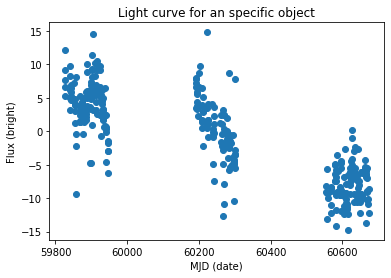

In [5]:
# get one light curve
oneLightCurve = mdf1[mdf1["object_id"] == 713]

# display plot
fig, ax = plt.subplots()
ax.scatter(oneLightCurve["mjd"], oneLightCurve["flux"])
ax.set_xlabel("MJD (date)")
ax.set_ylabel("Flux (bright)")
ax.set_title("Light curve for an specific object")

# Analyzing targets

In [ ]:
# grup by class (true target) and then counting the number of sampling
# amount = mdf1.groupby("true_target").count()
amount = mdf1.groupby("target").count()


# displaying the data
display(amount.sort_values(by=['object_id'], ascending = False).head())

Text(0.5, 1.0, 'Targets distribution')

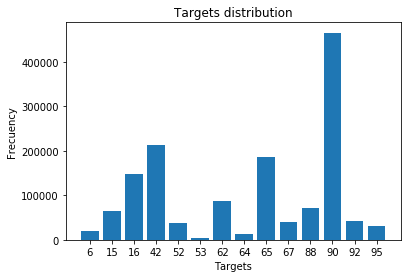

In [7]:
# ploting disordered classes
fig, ax = plt.subplots()
ax.bar([str(x) for x in amount.index.tolist()], amount.object_id.values)
ax.set_xlabel("Targets")
ax.set_ylabel("Frecuency")
ax.set_title("Targets distribution")

Text(0.5, 1.0, 'Targets distribution')

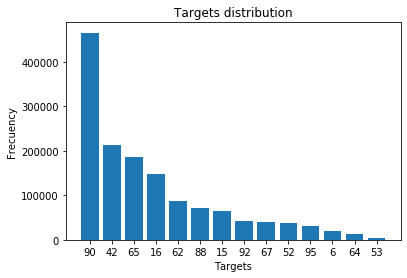

In [8]:
# ploting disordered classes
fig, ax = plt.subplots()
ax.bar([str(x) for x in amount.sort_values(by=['object_id'], ascending = False).index.tolist()], amount.sort_values(by=['object_id'], ascending = False).object_id.values)
ax.set_xlabel("Targets")
ax.set_ylabel("Frecuency")
ax.set_title("Targets distribution")

### Classes Analysis
From the histogram, we it can see classes are unbalanced. 
Based on that, It can select a number of classes trying to get a bunch of balanced classes.

,object_id,mjd,passband,flux,flux_err,detected_bool,ra,decl,ddf_bool,hostgal_specz,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
target,,,,,,,,,,,,,,,,,,,,,
42,212447,212447,212447,212447,212447,212447,212447,212447,212447,212447,...,212447,212447,212447,212447,212447,212447,212447,212447,212447,212447
65,185894,185894,185894,185894,185894,185894,185894,185894,185894,185894,...,185894,185894,185894,185894,185894,185894,185894,185894,185894,185894
16,147474,147474,147474,147474,147474,147474,147474,147474,147474,147474,...,147474,147474,147474,147474,147474,147474,147474,147474,147474,147474


Text(0.5, 1.0, 'Targets distribution')

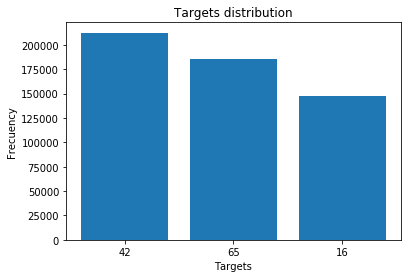

In [9]:
# Selecting classes
classesToAnalyze = [42, 65, 16]

# selecting the classes
_amount = amount.loc[classesToAnalyze, :]

# display
display(_amount.head())

# plotting
fig, ax = plt.subplots()
ax.bar([str(x) for x in _amount.index.tolist()], _amount.object_id.values)
ax.set_xlabel("Targets")
ax.set_ylabel("Frecuency")
ax.set_title("Targets distribution")

# Formating dataset to work
- Change name to dataframe (for simplicity)

- Select useful variables

In [6]:
# change name to dataframe
lightCurves = mdf1

# for take only a part of classes and remove anothers ones
# lightCurves = lightCurves.loc[lightCurves["true_target"].isin(classesToAnalyze)]

# filter by passband
lightCurves = lightCurves[lightCurves.passband == 1]


# getting only useful features
lightCurves = lightCurves[["object_id", "mjd", "flux", "flux_err", "true_target"]]
lightCurves = lightCurves.rename(columns={"true_target": "target"})
# display(lightCurves.head())


# printing information
display(lightCurves.head())
print("data shape: ", lightCurves.shape)
print("original objects ids: ", lightCurves.object_id.unique().shape)
# print("original classes: ", lightCurves.true_target.unique().shape)
print("original classes: ", lightCurves.target.unique().shape)

,object_id,mjd,flux,flux_err,target
1,615,59750.4306,-816.434326,5.553370,92
5,615,59752.4147,-1061.457031,6.472994,92
10,615,59767.3045,-815.188599,5.293019,92
15,615,59770.2256,-820.042786,5.875329,92
20,615,59779.3265,-921.002502,6.306800,92


data shape:  (176499, 5)
original objects ids:  (7848,)
original classes:  (14,)


# Standarizing data

In [8]:
# standarizing variables
# this returns a numpy array
stdLightCurves = StandardScaler().fit_transform(lightCurves.loc[:, ["flux", "flux_err"]])
display(stdLightCurves.shape)

# create new array wth standarized data
lightCurvesStd = lightCurves
# overwrite data
lightCurvesStd["flux"] = stdLightCurves[:, 0]
lightCurvesStd["flux_err"] = stdLightCurves[:, 1]

#printing dataset
display(lightCurvesStd.head())

(176499, 2)

,object_id,mjd,flux,flux_err,target
1,615,59750.4306,-0.766029,-0.011520,92
5,615,59752.4147,-0.990146,-0.006472,92
10,615,59767.3045,-0.764889,-0.012950,92
15,615,59770.2256,-0.769329,-0.009753,92
20,615,59779.3265,-0.861675,-0.007384,92


# Feature extraction with Autoencoder 

# Formating data to train AE

# Defining data to use

In [22]:
# Create dataset
variableIndexStart = 2
variableIndexEnd = -2

# define data to use
dataToUse = lightCurvesStd.iloc[:, variableIndexStart:variableIndexEnd].values

# display data
display(dataToUse.shape)

(176499, 1)

# Transform dataset to light curves dataset 

In [34]:
lightCurvesById = np.zeros(shape = (lightCurvesStd.object_id.unique().shape[0], dataToUse.shape[1]))

# transform ethe data set into array: [light curve,]
for objectId in lightCurvesStd.object_id.unique():
    
#     print(objectId)
    print(lightCurvesStd[lightCurvesStd.object_id == objectId])
    

     object_id         mjd      flux  flux_err  target
1          615  59750.4306 -0.766029 -0.011520      92
5          615  59752.4147 -0.990146 -0.006472      92
10         615  59767.3045 -0.764889 -0.012950      92
15         615  59770.2256 -0.769329 -0.009753      92
20         615  59779.3265 -0.861675 -0.007384      92
25         615  59782.1974 -0.430032 -0.019893      92
30         615  59797.2938  0.013227 -0.024639      92
35         615  59800.3244  0.099234 -0.018078      92
40         615  59807.1815 -0.404148 -0.019841      92
45         615  59810.1122 -0.501308 -0.018927      92
50         615  59813.1122 -1.025803 -0.005176      92
60         615  59835.0678 -0.182204 -0.021092      92
65         615  59839.0384 -0.891751 -0.008874      92
70         615  59842.0285 -0.937565 -0.007659      92
76         615  59854.0873  0.180048 -0.023711      92
81         615  59857.0531  0.572106 -0.012957      92
86         615  59864.0239 -0.881035 -0.009530      92
91        

       object_id         mjd      flux  flux_err  target
19743      10757  59825.2676 -0.019553 -0.036451      52
19748      10757  59839.2236 -0.019315 -0.035167      52
19753      10757  59842.2064 -0.020200 -0.036627      52
19759      10757  59854.2165 -0.019516 -0.037724      52
19764      10757  59857.1956 -0.020818 -0.026476      52
19769      10757  59867.1676 -0.020255 -0.035011      52
19774      10757  59870.1597 -0.019909 -0.037772      52
19779      10757  59873.1519 -0.019752 -0.038897      52
19791      10757  59884.1368 -0.019519 -0.036466      52
19796      10757  59887.1027 -0.020045 -0.029569      52
19801      10757  59896.0915  0.043690 -0.036111      52
19806      10757  59899.0930  0.081499 -0.034617      52
19811      10757  59902.0522  0.115901 -0.033272      52
19823      10757  59913.2522  0.189752 -0.033433      52
19828      10757  59916.0621  0.169571 -0.027438      52
19833      10757  59924.0665  0.090532 -0.036361      52
19838      10757  59927.0680  0

       object_id         mjd      flux  flux_err  target
39098      20934  59750.4306  0.263738 -0.026466      42
39102      20934  59752.4147  0.384370 -0.026406      42
39107      20934  59767.3045  0.244669 -0.031268      42
39112      20934  59770.2256  0.209573 -0.024519      42
39117      20934  59779.3265  0.129515 -0.025426      42
39122      20934  59782.1974  0.114041 -0.032538      42
39127      20934  59797.2938  0.062271 -0.034863      42
39132      20934  59800.3244  0.054334 -0.023385      42
39137      20934  59807.1815  0.042182 -0.030226      42
39142      20934  59810.1122  0.037204 -0.035797      42
39147      20934  59813.1122  0.035404 -0.036026      42
39157      20934  59835.0678  0.009660 -0.028262      42
39162      20934  59839.0384  0.010779 -0.035422      42
39167      20934  59842.0285  0.007943 -0.035978      42
39173      20934  59854.0873  0.002567 -0.035271      42
39178      20934  59857.0531  0.002911 -0.028410      42
39183      20934  59864.0239  0

       object_id         mjd      flux  flux_err  target
58967      30895  59750.4306 -0.021098 -0.003308      16
58971      30895  59752.4147 -0.016533 -0.003238      16
58976      30895  59767.3045 -0.023990 -0.001342      16
58981      30895  59770.2256 -0.027031 -0.001108      16
58986      30895  59779.3265 -0.018782 -0.001953      16
58991      30895  59782.1974 -0.018235  0.000280      16
58996      30895  59797.2938 -0.029578 -0.001292      16
59001      30895  59800.3244 -0.016800 -0.001066      16
59006      30895  59807.1815 -0.020154 -0.003046      16
59011      30895  59810.1122 -0.026544  0.000503      16
59016      30895  59813.1122 -0.025093 -0.000286      16
59026      30895  59835.0678 -0.015780 -0.001346      16
59031      30895  59839.0384 -0.026728  0.000048      16
59036      30895  59842.0285 -0.011944 -0.000015      16
59042      30895  59854.0873 -0.030143 -0.003520      16
59047      30895  59857.0531 -0.018154 -0.002367      16
59052      30895  59864.0239 -0

       object_id         mjd      flux  flux_err  target
77381      42224  59825.2676 -0.018954 -0.036372      42
77386      42224  59839.2236 -0.019525 -0.035073      42
77391      42224  59842.2064 -0.018855 -0.036550      42
77397      42224  59854.2165 -0.020727 -0.037665      42
77402      42224  59857.1956 -0.018877 -0.026262      42
77407      42224  59867.1676 -0.019371 -0.034915      42
77412      42224  59870.1597 -0.019388 -0.037714      42
77417      42224  59873.1519 -0.019788 -0.038854      42
77429      42224  59884.1368 -0.019300 -0.036389      42
77434      42224  59887.1027 -0.019067 -0.029398      42
77439      42224  59896.0915 -0.020809 -0.036824      42
77444      42224  59899.0930 -0.016613 -0.035774      42
77449      42224  59902.0522 -0.019183 -0.034897      42
77461      42224  59913.2522 -0.019401 -0.037593      42
77466      42224  59916.0621 -0.019402 -0.028815      42
77471      42224  59924.0665 -0.019414 -0.038380      42
77476      42224  59927.0680 -0

       object_id         mjd      flux  flux_err  target
97153      52740  59825.2676 -0.019689 -0.036487      90
97158      52740  59839.2236 -0.016869 -0.035197      90
97163      52740  59842.2064 -0.019926 -0.036662      90
97169      52740  59854.2165 -0.019099 -0.037750      90
97174      52740  59857.1956 -0.022064 -0.026577      90
97179      52740  59867.1676 -0.020208 -0.035057      90
97184      52740  59870.1597 -0.019487 -0.037800      90
97189      52740  59873.1519 -0.019217 -0.038916      90
97201      52740  59884.1368 -0.019205 -0.036501      90
97206      52740  59887.1027 -0.022283 -0.029650      90
97211      52740  59896.0915 -0.019745 -0.036927      90
97216      52740  59899.0930 -0.018499 -0.035912      90
97221      52740  59902.0522 -0.022425 -0.035039      90
97233      52740  59913.2522 -0.018799 -0.037676      90
97238      52740  59916.0621 -0.021885 -0.029078      90
97243      52740  59924.0665 -0.019366 -0.038453      90
97248      52740  59927.0680 -0

        object_id         mjd      flux  flux_err  target
115378      60976  59770.3740 -0.018633 -0.038669      52
115383      60976  59779.4075 -0.017585 -0.026667      52
115388      60976  59782.2450 -0.018081 -0.035657      52
115393      60976  59797.3412 -0.019669 -0.036780      52
115398      60976  59800.2406 -0.019853 -0.023768      52
115403      60976  59808.2301 -0.018088 -0.032187      52
115408      60976  59811.1357 -0.019232 -0.036659      52
115413      60976  59814.1283 -0.019271 -0.037105      52
115424      60976  59826.3650 -0.018795 -0.036419      52
115429      60976  59836.1479 -0.020108 -0.030960      52
115434      60976  59839.0860 -0.019893 -0.037600      52
115439      60976  59842.0761 -0.019942 -0.038076      52
115445      60976  59854.0303 -0.019284 -0.034246      52
115450      60976  59857.1008 -0.023501 -0.028263      52
115455      60976  59866.0250 -0.018464 -0.038031      52
115460      60976  59869.0266 -0.019655 -0.038053      52
115465      60

        object_id         mjd      flux  flux_err  target
134115      70898  59588.2266  0.017737 -0.036015      90
134120      70898  59591.2168  0.019634 -0.030442      90
134125      70898  59594.2720  0.019043 -0.025331      90
134130      70898  59618.2024 -0.012771 -0.035578      90
134135      70898  59621.1367 -0.014891 -0.024504      90
134141      70898  59646.0731 -0.017831 -0.033258      90
134146      70898  59649.0564 -0.017107 -0.030300      90
134151      70898  59660.0499 -0.018220 -0.035843      90
134156      70898  59663.0223 -0.015843 -0.033013      90
134161      70898  59666.0256 -0.019458 -0.032298      90
134167      70898  59679.0149 -0.019483 -0.030960      90
134172      70898  59688.0047 -0.016289 -0.026832      90
134177      70898  59691.0007 -0.018243 -0.036591      90
134182      70898  59694.0004 -0.019404 -0.035556      90
134190      70898  59947.3396 -0.020700 -0.034753      90
134195      70898  59957.2962 -0.021295 -0.028677      90
134200      70

        object_id         mjd      flux  flux_err  target
153206      78727  59825.2676 -0.019859 -0.036429      90
153211      78727  59839.2236 -0.018147 -0.035133      90
153216      78727  59842.2064 -0.018502 -0.036600      90
153222      78727  59854.2165 -0.018329 -0.037698      90
153227      78727  59857.1956 -0.018618 -0.026412      90
153232      78727  59867.1676 -0.019559 -0.034983      90
153237      78727  59870.1597 -0.019109 -0.037754      90
153242      78727  59873.1519 -0.019762 -0.038884      90
153254      78727  59884.1368 -0.018244 -0.036437      90
153259      78727  59887.1027 -0.019823 -0.029520      90
153264      78727  59896.0915 -0.019767 -0.036874      90
153269      78727  59899.0930 -0.020122 -0.035853      90
153274      78727  59902.0522 -0.018512 -0.034961      90
153286      78727  59913.2522 -0.019309 -0.037635      90
153291      78727  59916.0621 -0.016209 -0.028934      90
153296      78727  59924.0665 -0.018696 -0.038409      90
153301      78

KeyboardInterrupt: 

# Data to tensor

In [11]:
# variables
torchData = torch.from_numpy(dataToUse).float()

# targets
torchTargets = torch.tensor(lightCurvesStd.iloc[:, -1].values).float()

# creating dataset
dataset = data.TensorDataset(torchData, torchTargets)

(176499, 1)

# Spliting data

In [31]:
# Spliting the data

# selecting train splitting
train_size = int(0.8 * lightCurvesStd.shape[0])

# getting test splitting
test_size = lightCurvesStd.shape[0] - train_size

# spliting the torch dataset
trainDataset, testDataset = torch.utils.data.random_split(dataset, [train_size, test_size])


# Create data loader (minibatches)

# train loader
trainLoader = data.DataLoader(trainDataset, batch_size=256)

# test loader
testLoader = data.DataLoader(testDataset)

## Define autoencoder structure

In [48]:
# Buiding autoencoder

# encoder
class Encoder(torch.nn.Module):
    
    # init method
    def __init__(self, latent_dim, hidden_dim, input_dim = lightCurvesStd.iloc[:, variableIndexStart:variableIndexEnd].shape[1]):

        super(Encoder, self).__init__()
        
        # linear layer
        self.hidden1 = torch.nn.Linear(input_dim, hidden_dim)
        
        # linear layer
        self.hidden2 = torch.nn.Linear(hidden_dim, hidden_dim)
        
        # linear layer
        self.code = torch.nn.Linear(hidden_dim, latent_dim)
        
        # activation function
        self.activation = torch.nn.Softplus()

    # forward method
    def forward(self, x):
        
        # x -> hidden1 -> activation
        output = self.activation(self.hidden1(x))
        
        # output -> hidden1 -> activation
#         output = self.activation(self.hidden2(output))
        
        # output -> codification layer -> latent variables
        return (self.code(output))

# decoder    
class Decoder(torch.nn.Module):
    
    # define layers
    def __init__(self, latent_dim, hidden_dim, output_dim):
        
        super(Decoder, self).__init__()
        
        # linear layer
        self.hidden_1 = torch.nn.Linear(latent_dim, hidden_dim)
        
        # linear layer
#         self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)

        # linear layer (decode)
        self.decode = torch.nn.Linear(hidden_dim, output_dim)
        
        # activation function
        self.activation = torch.nn.Softplus()
        
    # forward method
    def forward(self, z):
        
        # z -> linaer layer -> activation -> output
        output = self.activation(self.hidden_1(z))
        
        # output -> linaer layer -> activation -> output
        output = self.activation(self.hidden_2(output))
        
        # output -> linear layer (decoder) -> output
        return (self.decode(output))

# building the autoencoder     
class AutoEncoder(torch.nn.Module):
    
    # defining the initial structure
    def __init__(self, latent_dim, hidden_dim, input_dim = lightCurvesStd.iloc[:, variableIndexStart:variableIndexEnd].shape[1]):
        
        super(AutoEncoder, self).__init__()
        
        # defining the encoder
        self.encoder = Encoder(latent_dim, hidden_dim, input_dim)
        
        # defining the decoder
        # note the output dimension in the decoder is the same as input dimension
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)
    
    # forward method (how to the nn works)
    def forward(self, x):
        
        # input (x) -> encoder -> latent variables -> decoder -> reconstruction (x)
        return self.decoder(self.encoder(x))

## Defining parameters to Autoencoder

In [49]:
# check number of parameters
latentDim = 10
hiddenDim = 10

# defining model
model = AutoEncoder(latent_dim = latentDim, hidden_dim = hiddenDim)

In [52]:
print("input dimension: {0}".format(lightCurvesStd.iloc[:, variableIndexStart:variableIndexEnd].shape))

# check model dimension
for name, param in model.state_dict().items():
    # name: str
    # param: Tensor
    print("{0}: {1} \n".format(name, param.shape))
#     print(param.shape)

input dimension: (176499, 1)
encoder.hidden1.weight: torch.Size([10, 1]) 

encoder.hidden1.bias: torch.Size([10]) 

encoder.hidden2.weight: torch.Size([10, 10]) 

encoder.hidden2.bias: torch.Size([10]) 

encoder.code.weight: torch.Size([10, 10]) 

encoder.code.bias: torch.Size([10]) 

decoder.hidden_1.weight: torch.Size([10, 10]) 

decoder.hidden_1.bias: torch.Size([10]) 

decoder.decode.weight: torch.Size([1, 10]) 

decoder.decode.bias: torch.Size([1]) 



# The input is [all light curves, 1] but it should be [one light curve, 1]

KeyboardInterrupt: 

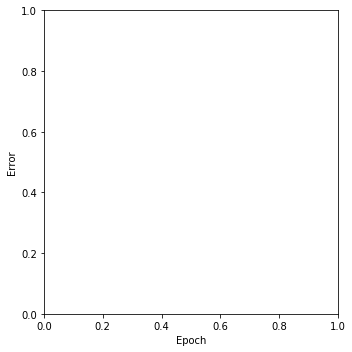

In [35]:
# loss function
criterion = torch.nn.MSELoss(reduction = "sum")

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# use of GPU flag
use_gpu = False

# load model on GPU
if use_gpu:
    model = model.cuda()

# number of epochs
epochs = 10

# loss
train_loss = np.zeros((epochs,))
test_loss = np.zeros((epochs,))

# loss plot
fig, ax = plt.subplots(figsize = (5, 5), tight_layout = True)
ax.set_xlabel("Epoch")
ax.set_ylabel("Error")

# early stopping
prior_test_error = 0
count_early_stop = 0
threshold_early_stop = 5

for nepoch in tqdm_notebook(range(epochs)):
    
    # train
    epoch_train_loss = 0
    
    for data, label in trainLoader:
        
        optimizer.zero_grad()
        
        if use_gpu:
            
            data = data.type(torch.FloatTensor).cuda()
            outputs = model.forward(data.type(torch.FloatTensor).cuda())
            
        else:
            data = data.type(torch.FloatTensor)
            outputs = model.forward(data.type(torch.FloatTensor))
        
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    train_loss[nepoch] = epoch_train_loss
    
    # test
    epoch_test_loss = 0
    
    for data, label in testLoader:
        
        if use_gpu:
            
            data = data.type(torch.FloatTensor).cuda()
            outputs = model.forward(data.cuda())
        else:
            data = data.type(torch.FloatTensor)
            
            outputs = model.forward(data)
        
        loss = criterion(outputs, data)
        
        epoch_test_loss += loss.item()
    
    test_loss[nepoch] = epoch_test_loss
    
    # plot loss
    ax.plot(train_loss[0: nepoch], label = "train", linewidth = 3, c = "red") 
    ax.plot(test_loss[0: nepoch], label = "test", linestyle = "--", linewidth = 3, c = "green") 

    fig.canvas.draw()
    
    # Early stopping
    if epoch_test_loss > prior_test_error:
        count_early_stop += 1
        print("early stopping counter: ", count_early_stop)
    else: 
        count_early_stop = 0
    
    # update prior test error
    prior_test_error = epoch_test_loss
    
    # analyze early stopping
    if count_early_stop > threshold_early_stop:
        
        print("Early stopping in epoch: ", nepoch)
        break

# Feature extraction with Variatonal Autoencoder 

## Defining model structure

copied from NN notebook (https://github.com/leoBravoRain/thesis/blob/master/work/VAE_for_NN_course/1_variational_autoencoder.ipynb)

In [2]:
# Write an encoder network that receives an MNIST digit and returns the parameters of the approximate posterior 
class Encoder(torch.nn.Module):
    def __init__(self, input_dim = 28*28, hidden_dim = 10, latent_dim = 2):
        super(Encoder, self).__init__()
        self.hidden_1 = torch.nn.Linear(input_dim, hidden_dim)
        self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)
        
        # mean of likelihood
        self.z_loc = torch.nn.Linear(hidden_dim, latent_dim)
        
        # variance of likelihood
        self.z_scale = torch.nn.Linear(hidden_dim, latent_dim)
        self.activation = torch.nn.Softplus()
            
    def forward(self, x):
        # it receives an image
        # reshape?
        out = self.activation(self.hidden_1(x))
        out = self.activation(self.hidden_2(out))
        # get mean 
        z_loc = self.z_loc(out)
        # get variance
        z_scale = torch.exp(self.z_scale(out))
         # return meand variance
        return z_loc, z_scale
    
# Write a decoder network that recieves a latent vector and returns an MNIST digit
class Decoder(torch.nn.Module):
    def __init__(self, latent_dim = 2, hidden_dim = 10, output_dim = 28*28):
        super(Decoder, self).__init__()
        self.hidden_1 = torch.nn.Linear(latent_dim, hidden_dim)
        self.hidden_2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.output = torch.nn.Linear(hidden_dim, output_dim)
        self.activation = torch.nn.Softplus()
            
    def forward(self, z):
        # it receives the latent variable
        out = self.activation(self.hidden_1(z))
        out = self.activation(self.hidden_2(out))
        
        out = self.activation(self.output(out))
        # it returns the MNIST digit
        return out
    
class VariationalAutoEncoder(torch.nn.Module):
    
    def __init__(self, latent_dim = 2):
        super(VariationalAutoEncoder, self).__init__() 
        self.encoder = Encoder(latent_dim = latent_dim)
        self.decoder = Decoder(latent_dim = latent_dim)
        self.latent_dim = latent_dim
        
    # generative model
    # p(x) = integral p(x|z) p(z)
    def model(self, x):
        pyro.module("decoder", self.decoder)
        with pyro.plate("data", size=x.shape[0]):
            # p(z) (prior)
            z_loc = torch.zeros(x.shape[0], self.latent_dim)
            z_scale = torch.ones(x.shape[0], self.latent_dim)
            z = pyro.sample("latent", Normal(z_loc, z_scale).to_event(1))
            
            # compute pi
            pi = self.decoder(z)
            
            # compute likelihood p(x|z)
            pyro.sample("reconstruction", Bernoulli(logits = pi, validate_args=False).to_event(1), 
                        obs = x.reshape(-1, 28*28))
            
    # posterior approximate
    def guide(self, x):
        pyro.module("encoder", self.encoder)
        with pyro.plate("data", size=x.shape[0]):
            # q(z|x)
            z_loc, z_scale  = self.encoder.forward(x.reshape(-1, 28*28))
            pyro.sample("latent", Normal(z_loc, z_scale).to_event(1))

NameError: name 'torch' is not defined

In [1]:
# Define SVI
pyro.enable_validation(True)
pyro.clear_param_store()

vae = VariationalAutoEncoder()
svi = pyro.infer.SVI(model=vae.model, 
                     guide=vae.guide, 
                     optim=pyro.optim.Adam({"lr": 1e-2}), 
                     loss=pyro.infer.TraceMeanField_ELBO(), 
                     num_samples=100)
# Train model
# Train the model using the Mean Field ELBO

fig, ax = plt.subplots()
epochs = 50
epochs_loss_array = np.zeros((epochs, 2))
for nepoch in tqdm_notebook(range(epochs)):
    
    # Actual training
    epoch_loss_train = 0.0
    for x, label in train_loader:
        epoch_loss_train += svi.step(x)
    epochs_loss_array[nepoch, 0] = epoch_loss_train
    
#     # validation data
#     epoch_loss_test = 0.0
#     for x, label in test_loader:
#         epoch_loss_test += svi.step(x)
#     epochs_loss_array[nepoch, 1] = epoch_loss_test
    
    # ploting results
    ax.plot(epochs_loss_array[0:nepoch, 0], c="b", label = "train")
#     ax.plot(epochs_loss_array[0:nepoch, 1], c="r", label = "test")
    fig.canvas.draw()

NameError: name 'pyro' is not defined